# 外れ値がない場合

## ヒンジ損失

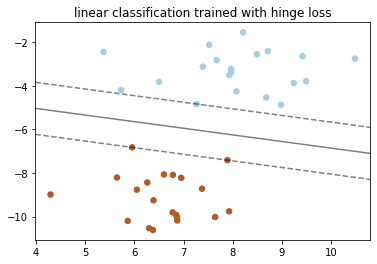

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # サポートベクタマシンの利用
from sklearn.datasets import make_blobs #分類データセット生成


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
#モデルの学習
clf = svm.SVC(kernel='linear', C=1000) #カーネルタイプを選択、C: 浮動小数点
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#決定関数のプロット
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#モデルの評価のためのグリッドの生成
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#決定境界と余白のプロット
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# サポートベクターのプロット
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

plt.title("linear classification trained with hinge loss")
plt.show()

## 二乗損失

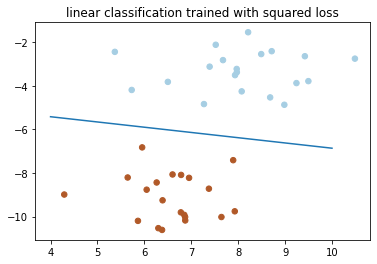

In [4]:
from sklearn.linear_model import LinearRegression


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
y=y*2 -1

# fit the model, don't regularize for illustration purposes
clf = LinearRegression(fit_intercept=True, normalize=True,  copy_X=True)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#plot decision function
x_plot = np.linspace(4, 10, 100)
w =[-1*clf.coef_[0] /clf.coef_[1],  -1*clf.intercept_ /clf.coef_[1] ]
y_plot = x_plot*w[0]-1*clf.intercept_ /clf.coef_[1]

plt.title("linear classification trained with squared loss")
plt.plot(x_plot, y_plot)



# 外れ値がある場合

## ヒンジ損失

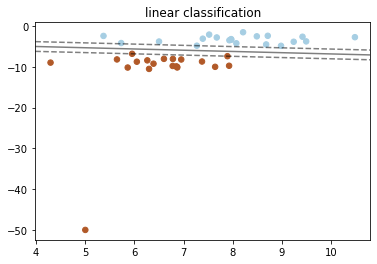

In [5]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

#Set an outlier
X[0,0]=5
X[0,1]=-50

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

plt.title("linear classification")
plt.show()

## 二乗損失

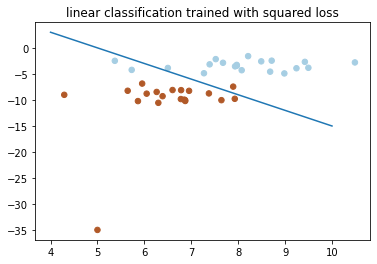

In [6]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
y=y*2 -1

#Set an outlier
X[0,0]=5
X[0,1]=-35

# fit the model, don't regularize for illustration purposes
clf = LinearRegression(fit_intercept=True, normalize=True,  copy_X=True)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#plot decision function
x_plot = np.linspace(4, 10, 100)
w =[-1*clf.coef_[0] /clf.coef_[1],  -1*clf.intercept_ /clf.coef_[1] ]
y_plot = x_plot*w[0]-1*clf.intercept_ /clf.coef_[1]
plt.title("linear classification trained with squared loss")
plt.plot(x_plot, y_plot)